In [1]:
import numpy as np
import pandas as pd
data0 = pd.read_csv('26feature.csv', index_col = None)
data0.head(2)

,sigle-atom,MagpieData minimum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData maximum CovalentRadius,...,packing fraction,sine coulomb matrix eig 0,sine coulomb matrix eig 3,sine coulomb matrix eig 5,sine coulomb matrix eig 6,sine coulomb matrix eig 8,sine coulomb matrix eig 11,SOAP_40,magmom,theoretical
0,3.736,55,33,77.0,862.573333,632.284444,8,13.333333,3.555556,132,...,0.073556,1491.101695,1202.240174,395.637373,380.398375,344.328015,361.301567,0.0,15.253,4
1,3.057,49,46,77.0,833.533333,897.644444,11,13.000000,4.666667,139,...,0.082227,2643.665053,966.679995,66.533883,0.000000,0.000000,0.000000,0.0,5.822,3


In [2]:
data_corre = data0.corr()['magmom'].abs().sort_values(ascending=False)[:10]
data_corre

magmom                               1.000000
theoretical                          0.884006
sigle-atom                           0.880524
SOAP_40                              0.559469
MagpieData maximum CovalentRadius    0.404913
vpa                                  0.328050
MagpieData mode NdUnfilled           0.283217
MagpieData range MendeleevNumber     0.264194
packing fraction                     0.256852
MagpieData mean SpaceGroupNumber     0.227818
Name: magmom, dtype: float64

<AxesSubplot:>

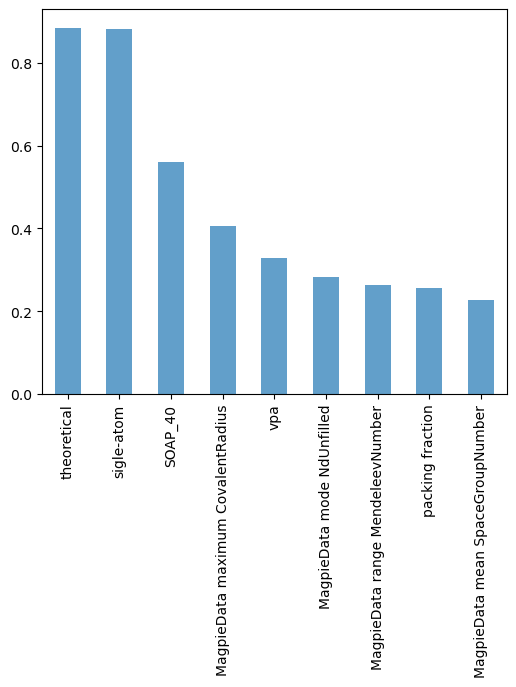

In [3]:
data_corre.drop('magmom').plot(kind = 'bar', rot = 90, alpha=0.7, figsize = (6,5))

In [4]:
y = data0['magmom'].values
excluded = ['magmom', 'theoretical']
X = data0.drop(excluded,axis=1)

print("There are %s possible dedscriptor:\n"%X.shape[1])
print('%s'%X.columns.values)

There are 25 possible dedscriptor:

['sigle-atom' 'MagpieData minimum MendeleevNumber'
 'MagpieData range MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData mean MeltingT' 'MagpieData avg_dev MeltingT'
 'MagpieData range Column' 'MagpieData mean Column'
 'MagpieData avg_dev Column' 'MagpieData maximum CovalentRadius'
 'MagpieData mode NdUnfilled' 'MagpieData range NUnfilled'
 'MagpieData mean NUnfilled' 'MagpieData avg_dev NUnfilled'
 'MagpieData mode GSmagmom' 'MagpieData mean SpaceGroupNumber' 'vpa'
 'packing fraction' 'sine coulomb matrix eig 0'
 'sine coulomb matrix eig 3' 'sine coulomb matrix eig 5'
 'sine coulomb matrix eig 6' 'sine coulomb matrix eig 8'
 'sine coulomb matrix eig 11' 'SOAP_40']


In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
crossvalidation = KFold(n_splits = 10, shuffle = True, random_state = 8)

In [6]:
#param_grid = {'n_estimators': [20, 40, 60, 100, 120],
#              'min_samples_split': [4, 5, 6, 7, 8],
#              'min_samples_leaf': range(1, 5)}
##kfold = StratifiedKFold(n_splits = 10, shuffle=True,
##                        random_state = 12) ### 回归算法交叉验证不需要分层
#model_kf = GridSearchCV(GradientBoostingRegressor(random_state = 33, criterion='squared_error'),
#                     param_grid, cv = crossvalidation, return_train_score=False)

#model_kf.fit(X_train, y_train)

In [7]:
#df_hyper_gbdt = pd.DataFrame(model_kf.cv_results_)

In [8]:
#model_kf.best_score_

In [9]:
#model_kf.score(X_test, y_test)

In [10]:
#model_kf.best_params_

In [11]:
model_GBDT = GradientBoostingRegressor(random_state=66,
                                       criterion='squared_error',
                                       min_samples_leaf= 3,
                                       min_samples_split= 4,
                                       n_estimators= 120)
r2_scores_gbdt = cross_val_score(model_GBDT, X_train, y_train, scoring = 'r2',
                                 cv = crossvalidation)
rmse_scores_gbdt = cross_val_score(model_GBDT, X_train, y_train, scoring = 'neg_root_mean_squared_error',
                                   cv = crossvalidation)
MAE_scores_gbdt = cross_val_score(model_GBDT, X_train, y_train, scoring='neg_mean_absolute_error', 
                                  cv = crossvalidation)
print()
print('GBDT train magmom Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_gbdt), np.mean(r2_scores_gbdt)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_gbdt), -np.mean(rmse_scores_gbdt)))
print('Folds: %i, mean MAE: %3f' % (len(MAE_scores_gbdt), -np.mean(MAE_scores_gbdt)))
print()
gbdt_test = model_GBDT.fit(X_train, y_train)
y_gbdt_predict = gbdt_test.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_scores_gbdt_test = r2_score(y_test, y_gbdt_predict)
rmse_scores_gbdt_test = np.sqrt(mean_squared_error(y_test, y_gbdt_predict))
mae_scores_gbdt_test = mean_absolute_error(y_test, y_gbdt_predict)

print()
print('GBR predict magmom results:')
print('mean R2: %3f' % (r2_scores_gbdt_test))
print('mean RMSE: %3f' % (rmse_scores_gbdt_test))
print('mean MAE: %3f' % (mae_scores_gbdt_test))
print()


GBDT train magmom Cross-validation results:
Folds: 10, mean R2: 0.944671
Folds: 10, mean RMSE: 0.649048
Folds: 10, mean MAE: 0.430270


GBR predict magmom results:
mean R2: 0.889209
mean RMSE: 1.043528
mean MAE: 0.555763



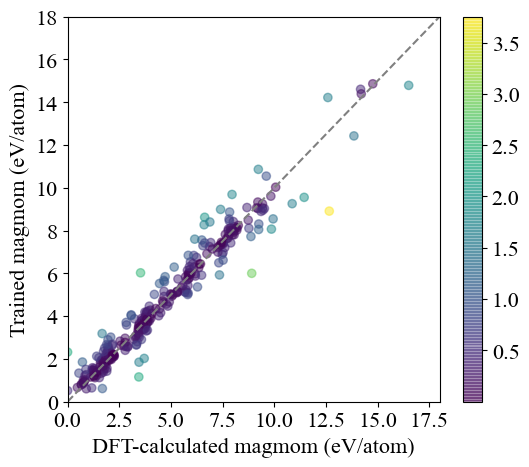

In [12]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['Times New Roman']

mpl.rcParams['lines.linestyle'] = '--'
plt.figure(figsize = (6,5))
s_x = np.linspace(0, 18, 100)
s_y = s_x
plt.scatter([ float(i) for i in y_train], cross_val_predict(model_GBDT, X_train, y_train, cv = crossvalidation), alpha = 0.5,  
            c= abs([ float(i) for i in y_train]-cross_val_predict(model_GBDT, X_train, y_train, cv = crossvalidation)))
plt.plot(s_x, s_y, color = 'grey')
#plt.legend(loc='upper left')
plt.xlabel('DFT-calculated magmom (eV/atom)', fontsize = 16)
plt.ylabel('Trained magmom (eV/atom)', fontsize = 16)
plt.xlim(0, 18)
plt.ylim(0, 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
#plt.colorbar()
plt.savefig('train4.png', dpi = 300)
#plt.show()

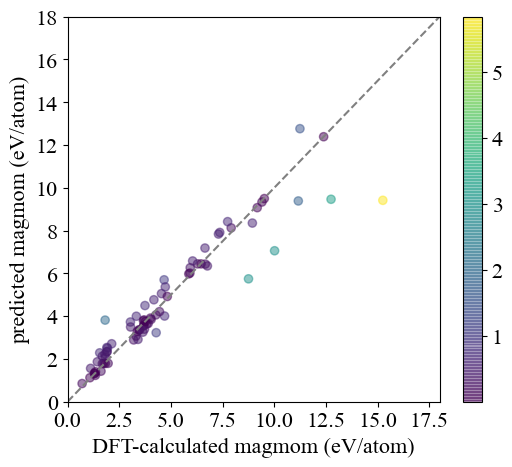

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['Times New Roman']

mpl.rcParams['lines.linestyle'] = '--'
plt.figure(figsize = (6,5))
s_x = np.linspace(0, 18, 100)
s_y = s_x
plt.scatter([ float(i) for i in y_test], [ float(i) for i in y_gbdt_predict], alpha = 0.5,
           c= abs(np.array([ float(i) for i in y_test])-np.array([ float(i) for i in y_gbdt_predict])))
plt.plot(s_x, s_y, color = 'grey')
#plt.legend(loc='upper left')
plt.xlabel('DFT-calculated magmom (eV/atom)', fontsize = 16)
plt.ylabel('predicted magmom (eV/atom)', fontsize = 16)
plt.xlim(0, 18)
plt.ylim(0, 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
#plt.colorbar()
plt.savefig('test4.png', dpi = 300)
#plt.show()